<a href="https://colab.research.google.com/github/SaachiDholakia/BA_865/blob/main/Past_Notebooks/Copy_of_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# German Traffic Sign Recognition Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
traffic_dataset = ('/content/drive/MyDrive/German Traffic Sign/Meta')
train_path = ('/content/drive/MyDrive/German Traffic Sign/Train')
test_path = ('/content/drive/MyDrive/German Traffic Sign/Test')

In [ ]:
train_imgs = 0
for image_dir in os.listdir(train_path):
    image_dir_path = train_path+'/'+image_dir
    train_imgs+=len(os.listdir(image_dir_path))

num_categories = len(os.listdir(train_path))
num_test_data = len(os.listdir(test_path))


print(f"Total no. of categories: {num_categories}\nNo. of total images: {num_test_data+train_imgs}\nTotal no. of images in training dir: {train_imgs}\nTotal no. of image in testing dir: {num_test_data}")

In [ ]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing for trucks in excess of 3.5 tons authorized weight',
            11:'Right of way',
            12:'Priority road',
            13:'Yield right of way',
            14:'Stop',
            15:'Prohibited for all vehicles',
            16:'Tractor and trucks with an authorized loaded weight of more than 3.5 tons prohibited',
            17:'Entry prohibited',
            18:'Danger',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Rough road',
            23:'Slippery road',
            24:'Road narrows',
            25:'Construction site',
            26:'Signals lights ahead',
            27:'Pedestrians crosswalk ahead',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End of restrictions',
            33:'Mandatory direction of travel(right)',
            34:'Mandatory direction of travel(left)',
            35:'AMandatory direction of travel(ahead)',
            36:'Mandatory direction of travel(ahead or right)',
            37:'Mandatory direction of travel(ahead or left)',
            38:'Keep right',
            39:'Keep left',
            40:'Traffic circle',
            41:'End of passing zone',
            42:'End of passing zone of more than 3.5 tons'
            }

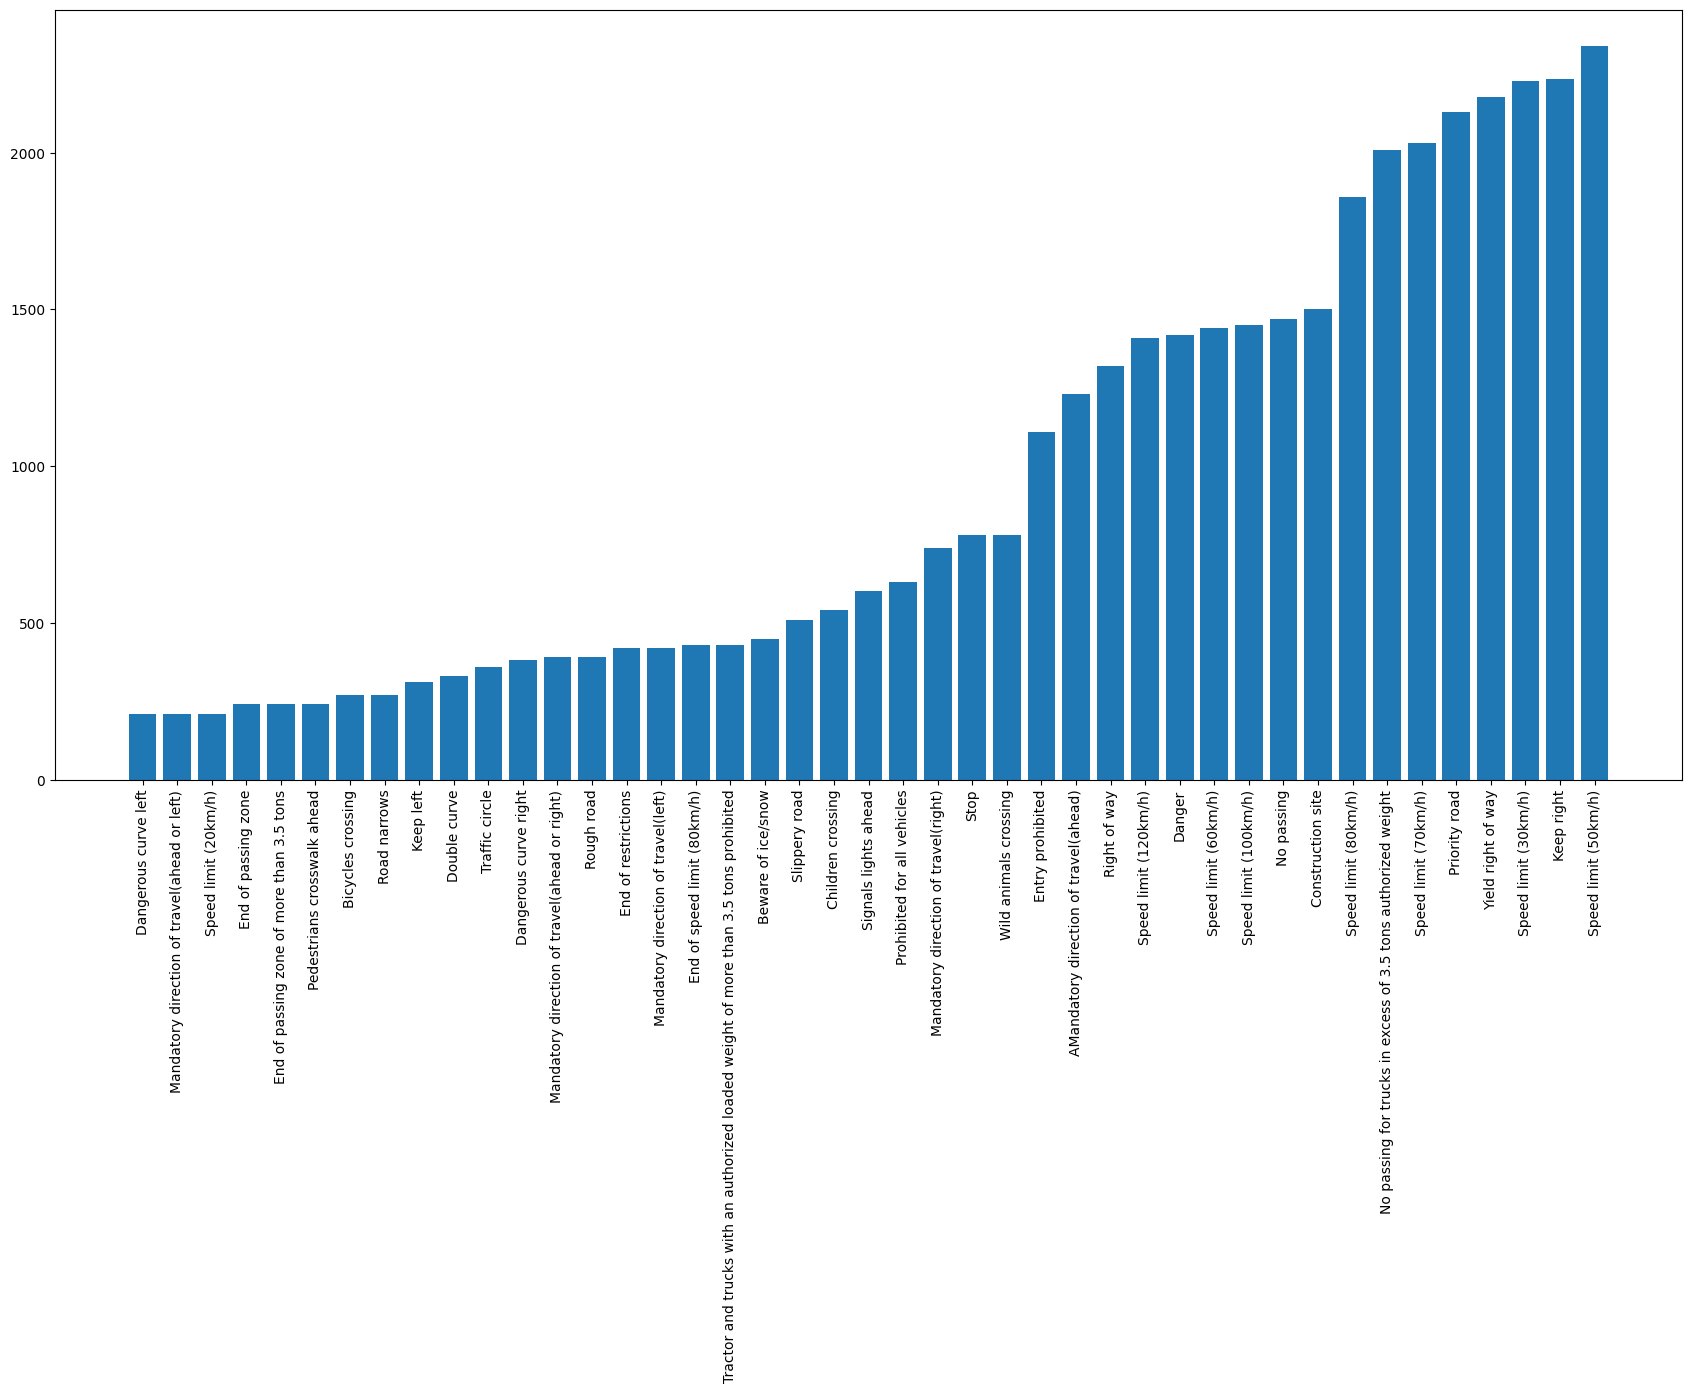

In [ ]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])

# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import random
from matplotlib.image import imread

test = pd.read_csv('/content/drive/MyDrive/German Traffic Sign/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(21,16))

for i in range(0,16):
    plt.subplot(4,4,i+1)
    img_path = traffic_dataset + '/' + imgs[i]
    img_class = classes[test.loc[test['Path']==imgs[i],'ClassId'].iloc[0]]
    img = imread(img_path)
    plt.imshow(img)
    plt.xlabel(f"Sign: {img_class}", fontsize = 12)
    plt.ylabel(f"shape: ({img.shape[0]},{img.shape[1]})", fontsize = 12)

In [ ]:
import cv2
from PIL import Image

resize_h,resize_w = 30,30

image_data = []
image_labels = []

for i in range(8):
    path = train_path + '/' + str(i)
    images = os.listdir(path)
    print(path)
    for img in images:
        #print(img)
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((resize_h, resize_w))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except Exception as e:
            print("Unable to read image " + img, e,sep='\n')

/content/drive/MyDrive/German Traffic Sign/Train/0
/content/drive/MyDrive/German Traffic Sign/Train/1
/content/drive/MyDrive/German Traffic Sign/Train/2
/content/drive/MyDrive/German Traffic Sign/Train/3
/content/drive/MyDrive/German Traffic Sign/Train/4
/content/drive/MyDrive/German Traffic Sign/Train/5
/content/drive/MyDrive/German Traffic Sign/Train/6
/content/drive/MyDrive/German Traffic Sign/Train/7


In [ ]:
import cv2
from PIL import Image

resize_h,resize_w = 30,30

image_data = []
image_labels = []

for i in range(8):
    path = test_path + '/' + str(i)
    images = os.listdir(path)
    print(path)
    for img in images:
        #print(img)
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((resize_h, resize_w))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except Exception as e:
            print("Unable to read image " + img, e,sep='\n')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/German Traffic Sign/Test/0'

In [ ]:
image_data = np.array(image_data)
image_labels = np.array(image_labels)

NameError: name 'image_data' is not defined

In [ ]:
import numpy as np

# Save image data and labels to files
np.save('/content/drive/MyDrive/German Traffic Sign/image_data.npy', image_data)
np.save('/content/drive/MyDrive/German Traffic Sign/image_labels.npy', image_labels)



NameError: name 'image_data' is not defined

In [ ]:
# Load image data and labels from files
image_data = np.load('/content/drive/MyDrive/German Traffic Sign/image_data.npy')
image_labels = np.load('/content/drive/MyDrive/German Traffic Sign/image_labels.npy')

In [ ]:
print(image_data.shape, image_labels.shape)

(11990, 30, 30, 3) (11990,)


In [ ]:
image_data[:2]

array([[[[138, 150, 171],
         [ 88, 116, 168],
         [ 84, 116, 174],
         ...,
         [ 84, 114, 178],
         [ 88, 119, 173],
         [ 92, 122, 165]],

        [[150, 156, 171],
         [100, 126, 161],
         [ 99, 128, 164],
         ...,
         [135, 155, 195],
         [141, 161, 189],
         [146, 164, 176]],

        [[157, 161, 163],
         [161, 161, 165],
         [166, 165, 168],
         ...,
         [143, 153, 157],
         [147, 154, 157],
         [154, 159, 160]],

        ...,

        [[140, 127, 126],
         [147, 131, 129],
         [131, 121, 115],
         ...,
         [ 92,  91,  88],
         [ 92,  91,  91],
         [ 93,  96,  96]],

        [[140, 152, 160],
         [214, 184, 195],
         [199, 178, 168],
         ...,
         [ 92,  94,  91],
         [ 88,  89,  88],
         [ 86,  92,  93]],

        [[201, 200, 216],
         [188, 176, 195],
         [193, 184, 169],
         ...,
         [ 97,  94,  91],
        

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.2, random_state=0, shuffle=True)

X_train = X_train/255
X_val = X_val/255

In [ ]:
print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (9592, 30, 30, 3)
X_valid.shape (2398, 30, 30, 3)
y_train.shape (9592,)
y_valid.shape (2398,)


In [ ]:
import tensorflow as tf

y_train = tf.keras.utils.to_categorical(y_train, 8)
y_val = tf.keras.utils.to_categorical(y_val, 8)

print(y_train.shape)
print(y_val.shape)

(9592, 8)
(2398, 8)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import time

### Fill in your code here.
model =Sequential()
model.add(Dense(128, activation='relu', input_shape=(30,30,3)))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(8,activation="softmax"))

callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30, 30, 128)       512       
                                                                 
 dropout (Dropout)           (None, 30, 30, 128)       0         
                                                                 
 dense_1 (Dense)             (None, 30, 30, 64)        8256      
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 64)        0         
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense_2 (Dense)             (None, 8)                 460808    
                                                                 
Total params: 469576 (1.79 MB)
Trainable params: 469576 

In [ ]:
results_dropout = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val),callbacks=[callback])

Epoch 1/10
300/300 [==============================] - 6s 9ms/step - loss: 1.4375 - accuracy: 0.4702 - val_loss: 0.9077 - val_accuracy: 0.6939
Epoch 2/10
300/300 [==============================] - 3s 9ms/step - loss: 0.7883 - accuracy: 0.7388 - val_loss: 0.6112 - val_accuracy: 0.8015
Epoch 3/10
300/300 [==============================] - 2s 7ms/step - loss: 0.5995 - accuracy: 0.8033 - val_loss: 0.5196 - val_accuracy: 0.8253
Epoch 4/10
300/300 [==============================] - 2s 7ms/step - loss: 0.4712 - accuracy: 0.8455 - val_loss: 0.3272 - val_accuracy: 0.8937
Epoch 5/10
300/300 [==============================] - 2s 7ms/step - loss: 0.3961 - accuracy: 0.8667 - val_loss: 0.3172 - val_accuracy: 0.8966
Epoch 6/10
300/300 [==============================] - 2s 8ms/step - loss: 0.3578 - accuracy: 0.8854 - val_loss: 0.4088 - val_accuracy: 0.8711
Epoch 7/10
300/300 [==============================] - 3s 8ms/step - loss: 0.3302 - accuracy: 0.8945 - val_loss: 0.3407 - val_accuracy: 0.8882
Epoch 

In [ ]:
model_2d = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(30,30,3)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(axis=-1),
    tf.keras.layers.Conv2D(filters=50, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.Conv2D(filters=50, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(axis=-1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.BatchNormalization(axis=-1),
    tf.keras.layers.Dropout(rate=0.4),
    #FInal Probability layer
    tf.keras.layers.Dense(8, activation='softmax')
])

epochs = 20

model_2d.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
model_2d.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 16)        448       
                                                                 
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_6 (Bat  (None, 13, 13, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 50)        14450     
                                                                 
 conv2d_11 (Conv2D)          (None, 9, 9, 50)         

In [ ]:
results_w_conv2d = model_2d.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val),callbacks=[callback])

Epoch 1/10
300/300 [==============================] - 6s 9ms/step - loss: 0.6946 - accuracy: 0.7749 - val_loss: 2.3583 - val_accuracy: 0.2923
Epoch 2/10
300/300 [==============================] - 2s 7ms/step - loss: 0.0839 - accuracy: 0.9758 - val_loss: 0.0719 - val_accuracy: 0.9833
Epoch 3/10
300/300 [==============================] - 2s 7ms/step - loss: 0.0445 - accuracy: 0.9888 - val_loss: 0.0459 - val_accuracy: 0.9879
Epoch 4/10
300/300 [==============================] - 2s 8ms/step - loss: 0.0250 - accuracy: 0.9932 - val_loss: 0.0348 - val_accuracy: 0.9908
Epoch 5/10
300/300 [==============================] - 3s 10ms/step - loss: 0.0151 - accuracy: 0.9956 - val_loss: 0.0347 - val_accuracy: 0.9900
Epoch 6/10
300/300 [==============================] - 2s 7ms/step - loss: 0.0164 - accuracy: 0.9962 - val_loss: 0.0343 - val_accuracy: 0.9883
Epoch 7/10
300/300 [==============================] - 2s 7ms/step - loss: 0.0185 - accuracy: 0.9946 - val_loss: 0.0348 - val_accuracy: 0.9867
Epoch

In [ ]:
!pip install wandb

In [ ]:
# Import to_categorical function
from tensorflow.keras.utils import to_categorical

# Ensure proper imports for x_train, y_train, x_test, y_test

wandb.login()

# Split the training data for validation
X_train_pg, X_val_pg, Y_train_pg, y_val_pg = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# One-hot encode the target labels
Y_train_pg = to_categorical(Y_train_pg, num_classes=8)
y_val_pg = to_categorical(y_val_pg, num_classes=8)

# Define your sweep configs
sweep_config = {
    'method': 'grid',
    'name': 'hyperparam-tuning',
    'metric': {'goal': 'maximize', 'name': 'val_accuracy'},
    'parameters': {
        'batch_size': {'values': [32, 64, 128]},
        'learning_rate': {'values': [1e-2, 1e-3, 1e-4]}
    }
}

# Define the main function
def main():
    # Initialize WandB
    run = wandb.init()

    # Define the model
    model_2d = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(30,30,3)),
        tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.BatchNormalization(axis=-1),
        tf.keras.layers.Conv2D(filters=50, kernel_size=(3,3), activation='relu'),
        tf.keras.layers.Conv2D(filters=50, kernel_size=(3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.BatchNormalization(axis=-1),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.BatchNormalization(axis=-1),
        tf.keras.layers.Dropout(rate=0.4),
        # Final Probability layer
        tf.keras.layers.Dense(8, activation='softmax')
    ])

    model_2d.summary()

    # Compile the model
    model_2d.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=run.config['learning_rate']),
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])

    # Define callbacks
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Fit the model
    model_2d.fit(X_train_pg, Y_train_pg,
              validation_data=(X_val_pg, y_val_pg),
              epochs=10,
              batch_size=run.config['batch_size'],
              callbacks=[WandbCallback(), early_stopping])

    # Evaluate the model on test data
    test_loss, test_accuracy = model_2d.evaluate(X_val_pg, y_val_pg)
    wandb.run.summary["test_accuracy"] = test_accuracy

# Initialize sweep
sweep_id = wandb.sweep(sweep=sweep_config, project="test8")

# Start sweep job
wandb.agent(sweep_id, function=main)


Create sweep with ID: d75cds0u
Sweep URL: https://wandb.ai/dylank/test8/sweeps/d75cds0u


wandb: Agent Starting Run: nuejnxeq with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.01


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 13, 13, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 50)        14450     
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 50)          2

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_004321-nuejnxeq/files/model-best)... Done. 0.0s


240/240 [==============================] - 26s 94ms/step - loss: 1.0989 - accuracy: 0.6205 - val_loss: 0.9095 - val_accuracy: 0.6660
Epoch 2/10
240/240 [==============================] - ETA: 0s - loss: 0.1695 - accuracy: 0.9490

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_004321-nuejnxeq/files/model-best)... Done. 0.0s


240/240 [==============================] - 20s 81ms/step - loss: 0.1695 - accuracy: 0.9490 - val_loss: 0.0969 - val_accuracy: 0.9719
Epoch 3/10
239/240 [============================>.] - ETA: 0s - loss: 0.1186 - accuracy: 0.9626

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_004321-nuejnxeq/files/model-best)... Done. 0.0s


240/240 [==============================] - 20s 83ms/step - loss: 0.1192 - accuracy: 0.9623 - val_loss: 0.0874 - val_accuracy: 0.9739
Epoch 4/10
240/240 [==============================] - 19s 78ms/step - loss: 0.0766 - accuracy: 0.9747 - val_loss: 0.1831 - val_accuracy: 0.9442
Epoch 5/10
240/240 [==============================] - 18s 73ms/step - loss: 0.0695 - accuracy: 0.9780 - val_loss: 0.4511 - val_accuracy: 0.8411
Epoch 6/10
239/240 [============================>.] - ETA: 0s - loss: 0.0601 - accuracy: 0.9804

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_004321-nuejnxeq/files/model-best)... Done. 0.0s


240/240 [==============================] - 20s 82ms/step - loss: 0.0600 - accuracy: 0.9805 - val_loss: 0.0592 - val_accuracy: 0.9812
Epoch 7/10
240/240 [==============================] - 16s 69ms/step - loss: 0.0321 - accuracy: 0.9892 - val_loss: 0.1067 - val_accuracy: 0.9640
Epoch 8/10
239/240 [============================>.] - ETA: 0s - loss: 0.0325 - accuracy: 0.9894

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_004321-nuejnxeq/files/model-best)... Done. 0.0s


240/240 [==============================] - 21s 87ms/step - loss: 0.0325 - accuracy: 0.9894 - val_loss: 0.0493 - val_accuracy: 0.9802
Epoch 9/10
240/240 [==============================] - 17s 70ms/step - loss: 0.0443 - accuracy: 0.9861 - val_loss: 0.2846 - val_accuracy: 0.9312
Epoch 10/10
239/240 [============================>.] - ETA: 0s - loss: 0.0377 - accuracy: 0.9880

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_004321-nuejnxeq/files/model-best)... Done. 0.0s


60/60 [==============================] - 1s 17ms/step - loss: 0.0391 - accuracy: 0.9896


accuracy,▁▇▇███████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▂▂▁▁▁▁▁▁▁
val_accuracy,▁██▇▅█▇█▇█
val_loss,█▁▁▂▄▁▂▁▃▁
accuracy,0.98788
best_epoch,9
best_val_loss,0.03905
epoch,9
loss,0.03773
test_accuracy,0.98958


wandb: Agent Starting Run: 529c0v56 with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.001


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 13, 13, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 50)        14450     
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 50)          2

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_004658-529c0v56/files/model-best)... Done. 0.0s


240/240 [==============================] - 22s 82ms/step - loss: 0.8202 - accuracy: 0.7285 - val_loss: 1.3677 - val_accuracy: 0.5070
Epoch 2/10
240/240 [==============================] - ETA: 0s - loss: 0.1089 - accuracy: 0.9690

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_004658-529c0v56/files/model-best)... Done. 0.0s


240/240 [==============================] - 21s 86ms/step - loss: 0.1089 - accuracy: 0.9690 - val_loss: 0.1730 - val_accuracy: 0.9562
Epoch 3/10
239/240 [============================>.] - ETA: 0s - loss: 0.0540 - accuracy: 0.9843

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_004658-529c0v56/files/model-best)... Done. 0.0s


240/240 [==============================] - 19s 81ms/step - loss: 0.0539 - accuracy: 0.9844 - val_loss: 0.0522 - val_accuracy: 0.9865
Epoch 4/10
240/240 [==============================] - 18s 75ms/step - loss: 0.0352 - accuracy: 0.9911 - val_loss: 0.0630 - val_accuracy: 0.9828
Epoch 5/10
239/240 [============================>.] - ETA: 0s - loss: 0.0277 - accuracy: 0.9922

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_004658-529c0v56/files/model-best)... Done. 0.0s


240/240 [==============================] - 19s 78ms/step - loss: 0.0276 - accuracy: 0.9922 - val_loss: 0.0250 - val_accuracy: 0.9917
Epoch 6/10
240/240 [==============================] - 16s 68ms/step - loss: 0.0198 - accuracy: 0.9954 - val_loss: 0.0311 - val_accuracy: 0.9906
Epoch 7/10
240/240 [==============================] - 17s 71ms/step - loss: 0.0213 - accuracy: 0.9943 - val_loss: 0.0393 - val_accuracy: 0.9885
Epoch 8/10
60/60 [==============================] - 1s 17ms/step - loss: 0.0250 - accuracy: 0.9917


accuracy,▁▇██████
epoch,▁▂▃▄▅▆▇█
loss,█▂▁▁▁▁▁▁
val_accuracy,▁▇██████
val_loss,█▂▁▁▁▁▁▁
accuracy,0.99466
best_epoch,4
best_val_loss,0.02499
epoch,7
loss,0.01896
test_accuracy,0.99166


wandb: Agent Starting Run: rk9vs7fg with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.0001


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 13, 13, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 50)        14450     
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 50)          2

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_005035-rk9vs7fg/files/model-best)... Done. 0.0s


240/240 [==============================] - 26s 99ms/step - loss: 1.9892 - accuracy: 0.3317 - val_loss: 1.9550 - val_accuracy: 0.2100
Epoch 2/10
240/240 [==============================] - ETA: 0s - loss: 1.1200 - accuracy: 0.6197

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_005035-rk9vs7fg/files/model-best)... Done. 0.0s


240/240 [==============================] - 22s 93ms/step - loss: 1.1200 - accuracy: 0.6197 - val_loss: 1.1799 - val_accuracy: 0.5998
Epoch 3/10
240/240 [==============================] - ETA: 0s - loss: 0.6747 - accuracy: 0.7788

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_005035-rk9vs7fg/files/model-best)... Done. 0.0s


240/240 [==============================] - 20s 84ms/step - loss: 0.6747 - accuracy: 0.7788 - val_loss: 0.4282 - val_accuracy: 0.8932
Epoch 4/10
240/240 [==============================] - ETA: 0s - loss: 0.4372 - accuracy: 0.8600

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_005035-rk9vs7fg/files/model-best)... Done. 0.0s


240/240 [==============================] - 21s 89ms/step - loss: 0.4372 - accuracy: 0.8600 - val_loss: 0.2966 - val_accuracy: 0.9151
Epoch 5/10
239/240 [============================>.] - ETA: 0s - loss: 0.3133 - accuracy: 0.9047

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_005035-rk9vs7fg/files/model-best)... Done. 0.0s


240/240 [==============================] - 19s 81ms/step - loss: 0.3126 - accuracy: 0.9050 - val_loss: 0.2114 - val_accuracy: 0.9479
Epoch 6/10
240/240 [==============================] - ETA: 0s - loss: 0.2366 - accuracy: 0.9275

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_005035-rk9vs7fg/files/model-best)... Done. 0.0s


240/240 [==============================] - 21s 86ms/step - loss: 0.2366 - accuracy: 0.9275 - val_loss: 0.1624 - val_accuracy: 0.9547
Epoch 7/10
239/240 [============================>.] - ETA: 0s - loss: 0.1847 - accuracy: 0.9480

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_005035-rk9vs7fg/files/model-best)... Done. 0.0s


240/240 [==============================] - 19s 80ms/step - loss: 0.1846 - accuracy: 0.9480 - val_loss: 0.1303 - val_accuracy: 0.9698
Epoch 8/10
239/240 [============================>.] - ETA: 0s - loss: 0.1444 - accuracy: 0.9599

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_005035-rk9vs7fg/files/model-best)... Done. 0.0s


240/240 [==============================] - 19s 79ms/step - loss: 0.1447 - accuracy: 0.9597 - val_loss: 0.1000 - val_accuracy: 0.9766
Epoch 9/10
239/240 [============================>.] - ETA: 0s - loss: 0.1187 - accuracy: 0.9680

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_005035-rk9vs7fg/files/model-best)... Done. 0.0s


240/240 [==============================] - 20s 83ms/step - loss: 0.1184 - accuracy: 0.9681 - val_loss: 0.0866 - val_accuracy: 0.9786
Epoch 10/10
239/240 [============================>.] - ETA: 0s - loss: 0.0958 - accuracy: 0.9779

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_005035-rk9vs7fg/files/model-best)... Done. 0.0s


60/60 [==============================] - 1s 17ms/step - loss: 0.0763 - accuracy: 0.9792


accuracy,▁▄▆▇▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▃▂▂▂▁▁▁▁
val_accuracy,▁▅▇▇██████
val_loss,█▅▂▂▂▁▁▁▁▁
accuracy,0.97784
best_epoch,9
best_val_loss,0.07633
epoch,9
loss,0.09592
test_accuracy,0.97916


wandb: Agent Starting Run: 5ozsnfae with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.01


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 13, 13, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 50)        14450     
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 50)          2

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_005417-5ozsnfae/files/model-best)... Done. 0.0s


120/120 [==============================] - 20s 147ms/step - loss: 1.7054 - accuracy: 0.3690 - val_loss: 1.6123 - val_accuracy: 0.4195
Epoch 2/10
120/120 [==============================] - 16s 132ms/step - loss: 0.2892 - accuracy: 0.9066 - val_loss: 1.7608 - val_accuracy: 0.3950
Epoch 3/10
120/120 [==============================] - ETA: 0s - loss: 0.0899 - accuracy: 0.9700

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_005417-5ozsnfae/files/model-best)... Done. 0.0s


120/120 [==============================] - 18s 151ms/step - loss: 0.0899 - accuracy: 0.9700 - val_loss: 0.1292 - val_accuracy: 0.9588
Epoch 4/10
120/120 [==============================] - ETA: 0s - loss: 0.0404 - accuracy: 0.9858

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_005417-5ozsnfae/files/model-best)... Done. 0.0s


120/120 [==============================] - 17s 145ms/step - loss: 0.0404 - accuracy: 0.9858 - val_loss: 0.0616 - val_accuracy: 0.9792
Epoch 5/10
120/120 [==============================] - 16s 130ms/step - loss: 0.0411 - accuracy: 0.9868 - val_loss: 0.0886 - val_accuracy: 0.9687
Epoch 6/10
120/120 [==============================] - 15s 126ms/step - loss: 0.0363 - accuracy: 0.9884 - val_loss: 0.1149 - val_accuracy: 0.9573
Epoch 7/10
120/120 [==============================] - ETA: 0s - loss: 0.0200 - accuracy: 0.9936

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_005417-5ozsnfae/files/model-best)... Done. 0.0s


120/120 [==============================] - 18s 151ms/step - loss: 0.0200 - accuracy: 0.9936 - val_loss: 0.0466 - val_accuracy: 0.9865
Epoch 8/10
120/120 [==============================] - 20s 166ms/step - loss: 0.0183 - accuracy: 0.9943 - val_loss: 0.0864 - val_accuracy: 0.9745
Epoch 9/10
120/120 [==============================] - ETA: 0s - loss: 0.0304 - accuracy: 0.9902

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_005417-5ozsnfae/files/model-best)... Done. 0.0s


120/120 [==============================] - 17s 140ms/step - loss: 0.0304 - accuracy: 0.9902 - val_loss: 0.0405 - val_accuracy: 0.9891
Epoch 10/10
120/120 [==============================] - ETA: 0s - loss: 0.0158 - accuracy: 0.9952

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_005417-5ozsnfae/files/model-best)... Done. 0.0s


60/60 [==============================] - 2s 29ms/step - loss: 0.0283 - accuracy: 0.9885


accuracy,▁▇████████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▂▁▁▁▁▁▁▁▁
val_accuracy,▁▁████████
val_loss,▇█▁▁▁▁▁▁▁▁
accuracy,0.99518
best_epoch,9
best_val_loss,0.02825
epoch,9
loss,0.01583
test_accuracy,0.98854


wandb: Agent Starting Run: 1j13alyp with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.001


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 13, 13, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 50)        14450     
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 50)          2

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_005759-1j13alyp/files/model-best)... Done. 0.0s


120/120 [==============================] - 21s 161ms/step - loss: 1.1406 - accuracy: 0.6200 - val_loss: 1.8603 - val_accuracy: 0.1980
Epoch 2/10
120/120 [==============================] - ETA: 0s - loss: 0.1830 - accuracy: 0.9490

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_005759-1j13alyp/files/model-best)... Done. 0.0s


120/120 [==============================] - 19s 155ms/step - loss: 0.1830 - accuracy: 0.9490 - val_loss: 1.4636 - val_accuracy: 0.3533
Epoch 3/10
120/120 [==============================] - ETA: 0s - loss: 0.0643 - accuracy: 0.9840

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_005759-1j13alyp/files/model-best)... Done. 0.0s


120/120 [==============================] - 18s 153ms/step - loss: 0.0643 - accuracy: 0.9840 - val_loss: 0.6485 - val_accuracy: 0.7916
Epoch 4/10
120/120 [==============================] - ETA: 0s - loss: 0.0324 - accuracy: 0.9932

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_005759-1j13alyp/files/model-best)... Done. 0.0s


120/120 [==============================] - 19s 159ms/step - loss: 0.0324 - accuracy: 0.9932 - val_loss: 0.2096 - val_accuracy: 0.9505
Epoch 5/10
120/120 [==============================] - ETA: 0s - loss: 0.0213 - accuracy: 0.9965

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_005759-1j13alyp/files/model-best)... Done. 0.0s


120/120 [==============================] - 18s 148ms/step - loss: 0.0213 - accuracy: 0.9965 - val_loss: 0.0361 - val_accuracy: 0.9906
Epoch 6/10
120/120 [==============================] - ETA: 0s - loss: 0.0131 - accuracy: 0.9983

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_005759-1j13alyp/files/model-best)... Done. 0.0s


120/120 [==============================] - 17s 142ms/step - loss: 0.0131 - accuracy: 0.9983 - val_loss: 0.0214 - val_accuracy: 0.9932
Epoch 7/10
120/120 [==============================] - 16s 130ms/step - loss: 0.0172 - accuracy: 0.9960 - val_loss: 0.0253 - val_accuracy: 0.9932
Epoch 8/10
120/120 [==============================] - ETA: 0s - loss: 0.0107 - accuracy: 0.9984

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_005759-1j13alyp/files/model-best)... Done. 0.0s


120/120 [==============================] - 21s 172ms/step - loss: 0.0107 - accuracy: 0.9984 - val_loss: 0.0209 - val_accuracy: 0.9922
Epoch 9/10
120/120 [==============================] - ETA: 0s - loss: 0.0076 - accuracy: 0.9984

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_005759-1j13alyp/files/model-best)... Done. 0.0s


120/120 [==============================] - 20s 163ms/step - loss: 0.0076 - accuracy: 0.9984 - val_loss: 0.0182 - val_accuracy: 0.9948
Epoch 10/10
60/60 [==============================] - 1s 19ms/step - loss: 0.0245 - accuracy: 0.9922


accuracy,▁▇████████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▂▁▁▁▁▁▁▁▁
val_accuracy,▁▂▆███████
val_loss,█▆▃▂▁▁▁▁▁▁
accuracy,0.99961
best_epoch,8
best_val_loss,0.01823
epoch,9
loss,0.00443
test_accuracy,0.99218


wandb: Agent Starting Run: 5w1k1qvs with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.0001


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 13, 13, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 50)        14450     
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 50)          2

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_010145-5w1k1qvs/files/model-best)... Done. 0.0s


120/120 [==============================] - 20s 148ms/step - loss: 2.0739 - accuracy: 0.3117 - val_loss: 2.1877 - val_accuracy: 0.1954
Epoch 2/10
120/120 [==============================] - 16s 132ms/step - loss: 1.3237 - accuracy: 0.5414 - val_loss: 2.1880 - val_accuracy: 0.1980
Epoch 3/10
120/120 [==============================] - ETA: 0s - loss: 0.8972 - accuracy: 0.7017

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_010145-5w1k1qvs/files/model-best)... Done. 0.0s


120/120 [==============================] - 18s 154ms/step - loss: 0.8972 - accuracy: 0.7017 - val_loss: 1.8141 - val_accuracy: 0.3022
Epoch 4/10
120/120 [==============================] - ETA: 0s - loss: 0.6169 - accuracy: 0.8054

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_010145-5w1k1qvs/files/model-best)... Done. 0.0s


120/120 [==============================] - 18s 151ms/step - loss: 0.6169 - accuracy: 0.8054 - val_loss: 1.1315 - val_accuracy: 0.5737
Epoch 5/10
120/120 [==============================] - ETA: 0s - loss: 0.4634 - accuracy: 0.8634

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_010145-5w1k1qvs/files/model-best)... Done. 0.0s


120/120 [==============================] - 18s 149ms/step - loss: 0.4634 - accuracy: 0.8634 - val_loss: 0.5205 - val_accuracy: 0.8864
Epoch 6/10
120/120 [==============================] - ETA: 0s - loss: 0.3503 - accuracy: 0.8989

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_010145-5w1k1qvs/files/model-best)... Done. 0.0s


120/120 [==============================] - 17s 144ms/step - loss: 0.3503 - accuracy: 0.8989 - val_loss: 0.2913 - val_accuracy: 0.9364
Epoch 7/10
120/120 [==============================] - ETA: 0s - loss: 0.2852 - accuracy: 0.9178

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_010145-5w1k1qvs/files/model-best)... Done. 0.0s


120/120 [==============================] - 19s 161ms/step - loss: 0.2852 - accuracy: 0.9178 - val_loss: 0.2138 - val_accuracy: 0.9489
Epoch 8/10
120/120 [==============================] - ETA: 0s - loss: 0.2254 - accuracy: 0.9371

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_010145-5w1k1qvs/files/model-best)... Done. 0.0s


120/120 [==============================] - 19s 163ms/step - loss: 0.2254 - accuracy: 0.9371 - val_loss: 0.1741 - val_accuracy: 0.9541
Epoch 9/10
120/120 [==============================] - ETA: 0s - loss: 0.1934 - accuracy: 0.9514

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_010145-5w1k1qvs/files/model-best)... Done. 0.0s


120/120 [==============================] - 18s 146ms/step - loss: 0.1934 - accuracy: 0.9514 - val_loss: 0.1509 - val_accuracy: 0.9640
Epoch 10/10
120/120 [==============================] - ETA: 0s - loss: 0.1557 - accuracy: 0.9636

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_010145-5w1k1qvs/files/model-best)... Done. 0.0s


60/60 [==============================] - 1s 18ms/step - loss: 0.1238 - accuracy: 0.9698


accuracy,▁▃▅▆▇▇████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▅▄▃▂▂▁▁▁▁
val_accuracy,▁▁▂▄▇█████
val_loss,██▇▄▂▂▁▁▁▁
accuracy,0.96364
best_epoch,9
best_val_loss,0.12379
epoch,9
loss,0.1557
test_accuracy,0.96978


wandb: Agent Starting Run: u9x6lo8d with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.01


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 13, 13, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 50)        14450     
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 50)          2

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_010532-u9x6lo8d/files/model-best)... Done. 0.0s


60/60 [==============================] - 19s 292ms/step - loss: 1.8612 - accuracy: 0.3239 - val_loss: 1.9119 - val_accuracy: 0.3246
Epoch 2/10
60/60 [==============================] - ETA: 0s - loss: 0.8626 - accuracy: 0.6871

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_010532-u9x6lo8d/files/model-best)... Done. 0.0s


60/60 [==============================] - 19s 308ms/step - loss: 0.8626 - accuracy: 0.6871 - val_loss: 0.6584 - val_accuracy: 0.7629
Epoch 3/10
60/60 [==============================] - ETA: 0s - loss: 0.2966 - accuracy: 0.9000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_010532-u9x6lo8d/files/model-best)... Done. 0.0s


60/60 [==============================] - 17s 286ms/step - loss: 0.2966 - accuracy: 0.9000 - val_loss: 0.3933 - val_accuracy: 0.8619
Epoch 4/10
60/60 [==============================] - ETA: 0s - loss: 0.1218 - accuracy: 0.9618

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_010532-u9x6lo8d/files/model-best)... Done. 0.0s


60/60 [==============================] - 18s 304ms/step - loss: 0.1218 - accuracy: 0.9618 - val_loss: 0.3666 - val_accuracy: 0.8739
Epoch 5/10
60/60 [==============================] - ETA: 0s - loss: 0.0715 - accuracy: 0.9764

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_010532-u9x6lo8d/files/model-best)... Done. 0.0s


60/60 [==============================] - 17s 286ms/step - loss: 0.0715 - accuracy: 0.9764 - val_loss: 0.1353 - val_accuracy: 0.9536
Epoch 6/10
60/60 [==============================] - ETA: 0s - loss: 0.0479 - accuracy: 0.9851

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_010532-u9x6lo8d/files/model-best)... Done. 0.0s


60/60 [==============================] - 17s 287ms/step - loss: 0.0479 - accuracy: 0.9851 - val_loss: 0.0730 - val_accuracy: 0.9781
Epoch 7/10
60/60 [==============================] - 16s 266ms/step - loss: 0.0401 - accuracy: 0.9880 - val_loss: 0.0802 - val_accuracy: 0.9729
Epoch 8/10
60/60 [==============================] - ETA: 0s - loss: 0.0295 - accuracy: 0.9894

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_010532-u9x6lo8d/files/model-best)... Done. 0.0s


60/60 [==============================] - 17s 277ms/step - loss: 0.0295 - accuracy: 0.9894 - val_loss: 0.0578 - val_accuracy: 0.9812
Epoch 9/10
60/60 [==============================] - ETA: 0s - loss: 0.0241 - accuracy: 0.9921

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_010532-u9x6lo8d/files/model-best)... Done. 0.0s


60/60 [==============================] - 17s 281ms/step - loss: 0.0241 - accuracy: 0.9921 - val_loss: 0.0319 - val_accuracy: 0.9896
Epoch 10/10
60/60 [==============================] - 1s 18ms/step - loss: 0.0531 - accuracy: 0.9849


accuracy,▁▅▇███████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▂▁▁▁▁▁▁▁
val_accuracy,▁▆▇▇██████
val_loss,█▃▂▂▁▁▁▁▁▁
accuracy,0.99335
best_epoch,8
best_val_loss,0.03195
epoch,9
loss,0.01867
test_accuracy,0.98489


wandb: Agent Starting Run: aweinj78 with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.001


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 13, 13, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 50)        14450     
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 50)          2

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_010919-aweinj78/files/model-best)... Done. 0.0s


60/60 [==============================] - 19s 285ms/step - loss: 1.4438 - accuracy: 0.5296 - val_loss: 1.9994 - val_accuracy: 0.3361
Epoch 2/10
60/60 [==============================] - 14s 242ms/step - loss: 0.3164 - accuracy: 0.9026 - val_loss: 2.0717 - val_accuracy: 0.3851
Epoch 3/10
60/60 [==============================] - 14s 237ms/step - loss: 0.1153 - accuracy: 0.9678 - val_loss: 2.0185 - val_accuracy: 0.3471
Epoch 4/10
60/60 [==============================] - ETA: 0s - loss: 0.0623 - accuracy: 0.9846

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_010919-aweinj78/files/model-best)... Done. 0.0s


60/60 [==============================] - 17s 282ms/step - loss: 0.0623 - accuracy: 0.9846 - val_loss: 1.9740 - val_accuracy: 0.2965
Epoch 5/10
60/60 [==============================] - ETA: 0s - loss: 0.0386 - accuracy: 0.9914

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_010919-aweinj78/files/model-best)... Done. 0.0s


60/60 [==============================] - 18s 297ms/step - loss: 0.0386 - accuracy: 0.9914 - val_loss: 1.5715 - val_accuracy: 0.3090
Epoch 6/10
60/60 [==============================] - ETA: 0s - loss: 0.0261 - accuracy: 0.9950

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_010919-aweinj78/files/model-best)... Done. 0.0s


60/60 [==============================] - 19s 316ms/step - loss: 0.0261 - accuracy: 0.9950 - val_loss: 1.2468 - val_accuracy: 0.4257
Epoch 7/10
60/60 [==============================] - ETA: 0s - loss: 0.0188 - accuracy: 0.9971

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_010919-aweinj78/files/model-best)... Done. 0.0s


60/60 [==============================] - 18s 298ms/step - loss: 0.0188 - accuracy: 0.9971 - val_loss: 0.5299 - val_accuracy: 0.7681
Epoch 8/10
60/60 [==============================] - ETA: 0s - loss: 0.0151 - accuracy: 0.9977

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_010919-aweinj78/files/model-best)... Done. 0.0s


60/60 [==============================] - 17s 291ms/step - loss: 0.0151 - accuracy: 0.9977 - val_loss: 0.1266 - val_accuracy: 0.9703
Epoch 9/10
60/60 [==============================] - ETA: 0s - loss: 0.0138 - accuracy: 0.9978

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_010919-aweinj78/files/model-best)... Done. 0.0s


60/60 [==============================] - 19s 311ms/step - loss: 0.0138 - accuracy: 0.9978 - val_loss: 0.0871 - val_accuracy: 0.9745
Epoch 10/10
60/60 [==============================] - 2s 27ms/step - loss: 0.0958 - accuracy: 0.9719


accuracy,▁▇████████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▂▂▁▁▁▁▁▁▁
val_accuracy,▁▂▂▁▁▂▆███
val_loss,████▆▅▃▁▁▁
accuracy,0.99844
best_epoch,8
best_val_loss,0.08712
epoch,9
loss,0.0093
test_accuracy,0.97186


wandb: Agent Starting Run: gepn1mmj with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.0001


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 13, 13, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 50)        14450     
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 50)          2

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_011307-gepn1mmj/files/model-best)... Done. 0.0s


60/60 [==============================] - 21s 312ms/step - loss: 2.1985 - accuracy: 0.2825 - val_loss: 2.0957 - val_accuracy: 0.2215
Epoch 2/10
60/60 [==============================] - ETA: 0s - loss: 1.5149 - accuracy: 0.4753

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_011307-gepn1mmj/files/model-best)... Done. 0.0s


60/60 [==============================] - 18s 292ms/step - loss: 1.5149 - accuracy: 0.4753 - val_loss: 2.0823 - val_accuracy: 0.1980
Epoch 3/10
60/60 [==============================] - ETA: 0s - loss: 1.0991 - accuracy: 0.6286

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_011307-gepn1mmj/files/model-best)... Done. 0.0s


60/60 [==============================] - 16s 275ms/step - loss: 1.0991 - accuracy: 0.6286 - val_loss: 2.0339 - val_accuracy: 0.1985
Epoch 4/10
60/60 [==============================] - ETA: 0s - loss: 0.8577 - accuracy: 0.7231

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_011307-gepn1mmj/files/model-best)... Done. 0.0s


60/60 [==============================] - 19s 319ms/step - loss: 0.8577 - accuracy: 0.7231 - val_loss: 1.9320 - val_accuracy: 0.2100
Epoch 5/10
60/60 [==============================] - ETA: 0s - loss: 0.6674 - accuracy: 0.7856

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_011307-gepn1mmj/files/model-best)... Done. 0.0s


60/60 [==============================] - 16s 275ms/step - loss: 0.6674 - accuracy: 0.7856 - val_loss: 1.7496 - val_accuracy: 0.2387
Epoch 6/10
60/60 [==============================] - ETA: 0s - loss: 0.5214 - accuracy: 0.8368

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_011307-gepn1mmj/files/model-best)... Done. 0.0s


60/60 [==============================] - 17s 285ms/step - loss: 0.5214 - accuracy: 0.8368 - val_loss: 1.4509 - val_accuracy: 0.3705
Epoch 7/10
60/60 [==============================] - ETA: 0s - loss: 0.4212 - accuracy: 0.8716

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_011307-gepn1mmj/files/model-best)... Done. 0.0s


60/60 [==============================] - 20s 326ms/step - loss: 0.4212 - accuracy: 0.8716 - val_loss: 1.0867 - val_accuracy: 0.5961
Epoch 8/10
60/60 [==============================] - ETA: 0s - loss: 0.3485 - accuracy: 0.8995

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_011307-gepn1mmj/files/model-best)... Done. 0.0s


60/60 [==============================] - 16s 272ms/step - loss: 0.3485 - accuracy: 0.8995 - val_loss: 0.7840 - val_accuracy: 0.7311
Epoch 9/10
60/60 [==============================] - ETA: 0s - loss: 0.2849 - accuracy: 0.9218

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_011307-gepn1mmj/files/model-best)... Done. 0.0s


60/60 [==============================] - 17s 280ms/step - loss: 0.2849 - accuracy: 0.9218 - val_loss: 0.4687 - val_accuracy: 0.8755
Epoch 10/10
60/60 [==============================] - ETA: 0s - loss: 0.2408 - accuracy: 0.9354

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20240424_011307-gepn1mmj/files/model-best)... Done. 0.0s


60/60 [==============================] - 1s 25ms/step - loss: 0.3173 - accuracy: 0.9125


accuracy,▁▃▅▆▆▇▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▆▄▃▃▂▂▁▁▁
val_accuracy,▁▁▁▁▁▃▅▆██
val_loss,███▇▇▅▄▃▂▁
accuracy,0.93536
best_epoch,9
best_val_loss,0.31733
epoch,9
loss,0.2408
test_accuracy,0.91245


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import time

### Fill in your code here.
model =Sequential()
model.add(Dense(128, activation='tanh', input_shape=(30,30,3)))
model.add(Dropout(0.4))
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(8,activation="softmax"))

callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 30, 30, 128)       512       
                                                                 
 dropout_5 (Dropout)         (None, 30, 30, 128)       0         
                                                                 
 dense_10 (Dense)            (None, 30, 30, 64)        8256      
                                                                 
 dropout_6 (Dropout)         (None, 30, 30, 64)        0         
                                                                 
 flatten_4 (Flatten)         (None, 57600)             0         
                                                                 
 dense_11 (Dense)            (None, 8)                 460808    
                                                                 
Total params: 469576 (1.79 MB)
Trainable params: 46957

In [ ]:
results_dropout = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val),callbacks=[callback])

Epoch 1/10
300/300 [==============================] - 5s 11ms/step - loss: 1.3431 - accuracy: 0.5057 - val_loss: 0.8369 - val_accuracy: 0.7310
Epoch 2/10
300/300 [==============================] - 2s 7ms/step - loss: 0.7404 - accuracy: 0.7598 - val_loss: 0.5848 - val_accuracy: 0.7990
Epoch 3/10
300/300 [==============================] - 2s 7ms/step - loss: 0.5759 - accuracy: 0.8230 - val_loss: 0.5879 - val_accuracy: 0.8098
Epoch 4/10
300/300 [==============================] - 2s 7ms/step - loss: 0.4805 - accuracy: 0.8446 - val_loss: 0.4062 - val_accuracy: 0.8716
Epoch 5/10
300/300 [==============================] - 2s 7ms/step - loss: 0.4419 - accuracy: 0.8571 - val_loss: 0.4070 - val_accuracy: 0.8670
Epoch 6/10
300/300 [==============================] - 3s 9ms/step - loss: 0.4091 - accuracy: 0.8731 - val_loss: 0.4285 - val_accuracy: 0.8741
Epoch 7/10
300/300 [==============================] - 3s 9ms/step - loss: 0.3728 - accuracy: 0.8803 - val_loss: 0.3586 - val_accuracy: 0.8857
Epoch

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
num_samples, height, width, channels = X_train.shape
X_train_reshaped = X_train.reshape(num_samples, height * width * channels)

model = KNeighborsClassifier()
model.fit(X_train_reshaped, y_train)

KNeighborsClassifier()

In [ ]:
num_samples, height, width, channels = X_val.shape
X_val_reshaped = X_val.reshape(num_samples, height * width * channels)
y_pred = model.predict(X_val_reshaped)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79        39
           1       0.88      0.90      0.89       430
           2       0.89      0.88      0.89       498
           3       0.85      0.82      0.83       254
           4       0.91      0.86      0.89       428
           5       0.83      0.85      0.84       385
           6       0.97      0.94      0.96        82
           7       0.85      0.89      0.87       282

    accuracy                           0.87      2398
   macro avg       0.87      0.87      0.87      2398
weighted avg       0.87      0.87      0.87      2398

